# Technique Assignment 5: Clustering
## Cogs Spring 2020
### Due: Friday June 5 11:59pm
### 100 points total
### Er Lin - A16140839

In [1]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [2]:
## Load the data to be clustered (X)
## Load the set of priors, p1-p3
data = loadmat('cluster_data.mat')
X = data['kmeandata']
print(X.shape)

(560, 2)


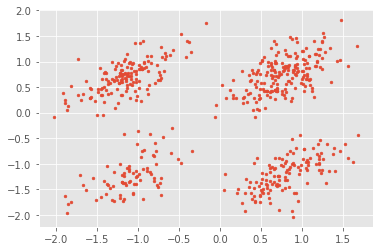

In [3]:
## Plot the data with no cluster labels
plt.scatter(X[:,0], X[:,1], s=8);

In [4]:
def calculate_distance(a, b):
    """
    Function that calculates distance between 2 points in any dimension 
    """
    summation = np.sum([(a[i]-b[i])**2 for i in range(len(a))])
    return np.sqrt(summation)

In [5]:
def centroid(points):
    """
    Function that calculates the centroid of a given list of points of any dimension
    """
#     if len(points) == 0:
#         return np.NaN
    
    T = points.T
    return [np.mean(var) for var in T]

In [34]:
def clustering(C, k, X, iterations=4, question5=False):
    """
    Function that simulates clustering given initial clusters 
    """
    if not question5:
        fig, axes = plt.subplots(2,2, figsize=(12,8))

    # set number of k-mean iterations
    for itr in range(iterations):
        # initialize cluster membership
        cluster_ind = []

        # find distance of every point to each centroid, and assign cluster membership
        for x in X:
            # calculate distance to each centroid  
            distances = [calculate_distance(C[i], x) for i in range(len(C))] 
            # get index of the minimum distance 
            index = distances.index(np.min(distances))
            cluster_ind.append(index) # assign to cluster 
        
        # indexing for creating the graphs 
        if not question5:
            if itr > 1:
                row = 1
            else:
                row = 0
        
        # update cluster centroids
        for i in range(k):
            # find points that belong to cluster i 
            points = np.array([X[j] for j in range(len(X)) if cluster_ind[j] == i])
            
            # find the new centroid 
            new_centroid = centroid(points)  
            if len(centroid(points)) != 0:
                C[i] = new_centroid
            
            if not question5:
                axes[row, itr%2].scatter(points[:,0], points[:,1], label=C[i], s=8) # plot points for each cluster 
        
        if not question5:
            axes[row, itr%2].set_title('Iteration ' + str(itr))
    
    if question5:
        return cluster_ind, C
            

## Question 1. Part a -f

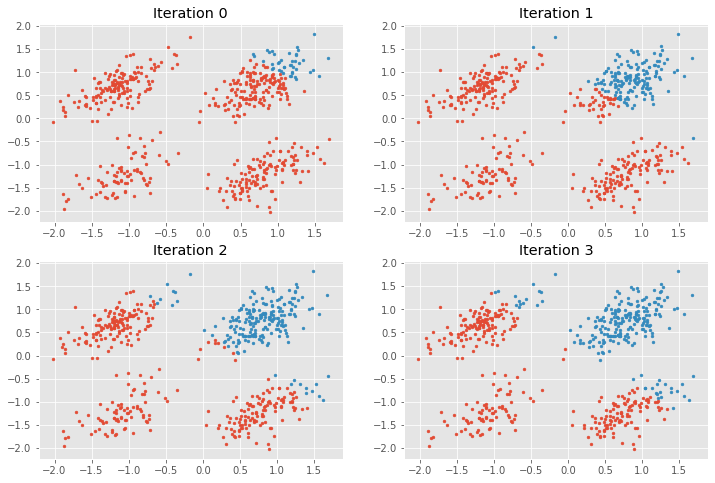

In [7]:
k = 2

# Assign 2 clusters (1st initialization)
C = [[-2,-2],
     [4,4]]

clustering(C, k, X)

## Question 1. Part g

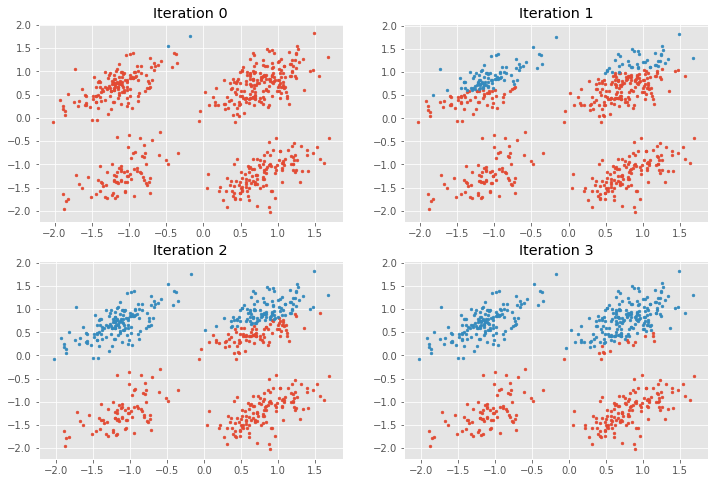

In [8]:
k = 2

# Assign 2 clusters (2nd initialization)
C = [[0,-1],
     [-1,4]]

# Use code from above to generate similar graphs, but with new cluster initialization
clustering(C, k, X)

## Question 2: k = 3

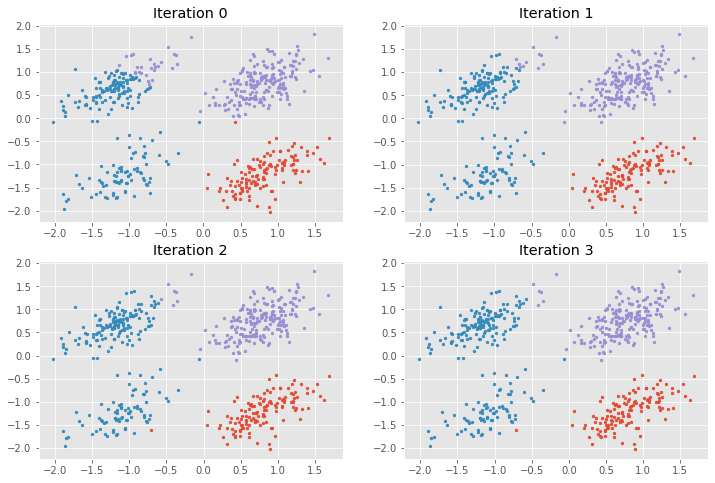

In [9]:
k = 3

# Assign 3 clusters (1st initialization)
C = [[2,-2],
    [-2,-2],
    [2,2]]

# Use code from above
clustering(C, k, X)

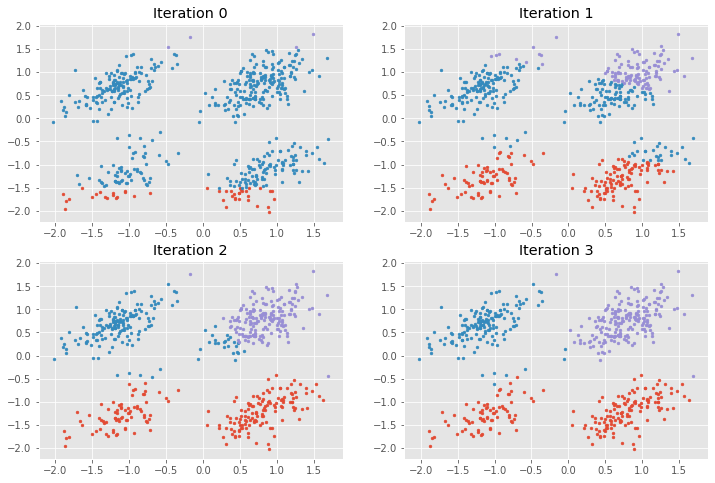

In [10]:
k = 3

# Assign 3 clusters (2nd initialization)
C = [[0,-3],
    [0,0],
    [0,3]]

clustering(C, k, X)

## Question 3: k = 4

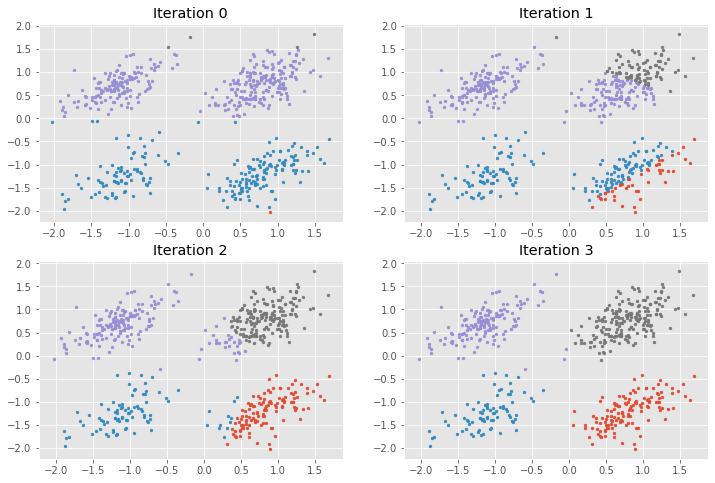

In [11]:
k = 4

# Assign 4 clusters
C = [[0,-3],
    [0,-1],
    [0,1],
    [0,2]]

clustering(C, k, X)

## Question 4
#### Which value of k will produce the best result? How can you tell?
k=4 will produce the best result. 
Without doing any further analysis, just by looking at the scatter plots we can clearly see that they are 4 distinct clusters and when we do k=4 k-means we get the 4 clusters properly divided into different colors. Therefore k=4 being the best out of k = [2,3,4]. <br>
If we were to do further analysis we would probably get a lower total error (total distance) for k=4 confirming that it produces the best result.

## Question 5

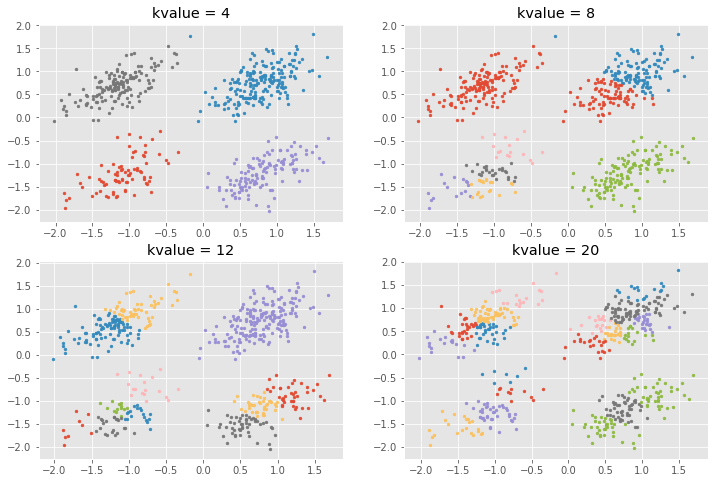

In [12]:
k = [4, 8, 12, 20]

# set dictionary to access row and columns for plotting 
row_col = {
    4: (0,0),
    8: (0,1),
    12: (1,0),
    20: (1,1)
}
fig, axes = plt.subplots(2,2, figsize=(12,8))

for kvalue in k:
    # Assign k clusters as randomly selected points from the dataset
    C = X[np.random.randint(X.shape[0], size=kvalue)]
    # get the clusters iterating 200 times 
    cluster_ind, _ = clustering(C, kvalue, X, 200, True)
    
    row, col = row_col[kvalue] # get the the indexes for the subplots 
    
    for i in range(kvalue):
        # find points that belong to cluster i and plot the points 
        points = np.array([X[j] for j in range(len(X)) if cluster_ind[j] == i])
        axes[row, col].scatter(points[:,0], points[:,1], label=C[i], s=8)
        
    axes[row, col].set_title('kvalue = ' + str(kvalue))

## Question 6

### Part a

In [13]:
total_distances = []

In [14]:
for k in range(1, 26):
    k_distances = []
    # Assign k clusters as randomly selected points from the dataset
    C = X[np.random.randint(X.shape[0], size=k)]
    # get the clusters iterating 200 times 
    cluster_ind, new_C = clustering(C, k, X, 200, True)
    
    # get the distances of each point 
    for i in range(len(X)):
        cluster = cluster_ind[i]
        k_distances.append(calculate_distance(X[i], new_C[cluster]))    
    
    total_distances.append(np.sum(k_distances))

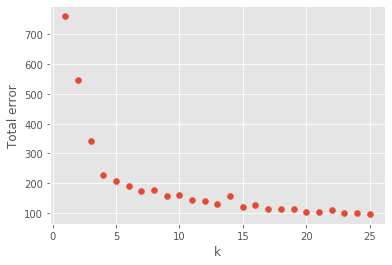

In [16]:
plt.scatter(np.arange(1, len(total_distances) + 1, dtype=int), total_distances)
plt.xlabel('k')
plt.ylabel('Total error');

I think k = 4 explains the data the best since by looking at the graph we can see that it is approximately the inflection point. As we increase k after k=4 we see that the total error decrease is not significant.

### Part b
There exist some jumps because since we are choosing the initial centroids randomly, depending of the ones that we start with, after running the model we might not get the global optimum since the k-means error distribution is a non-convex function. The jumps that appear in the graph correspond to local optimums instead of the global optimum. 

### Part c

In [18]:
total_distances = []

In [19]:
for k in range(1, 26):
    
    cur_total_distances = []
    
    for _ in range(5):
    
        k_distances = [] # distances for this specific k 
    
        # Assign k clusters as randomly selected points from the dataset
        C = X[np.random.randint(X.shape[0], size=k)]
        # get the clusters iterating 200 times 
        cluster_ind, new_C = clustering(C, k, X, 200, True)

        # get the distances of each point 
        for i in range(len(X)):
            cluster = cluster_ind[i]
            k_distances.append(calculate_distance(X[i], new_C[cluster]))    

        cur_total_distances.append(np.sum(k_distances))
        
    total_distances.append(np.min(cur_total_distances))

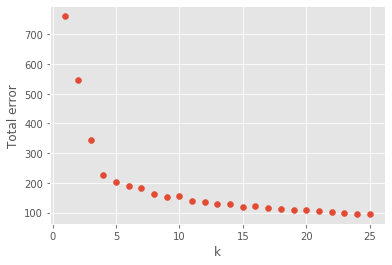

In [20]:
plt.scatter(np.arange(1, len(total_distances) + 1), total_distances)
plt.xlabel('k')
plt.ylabel('Total error');

## Question 7: Extra Credit

The following dataset contains 1797 sample of 8x8 images representing written numbers from 0 to 9. <br> 
Given the definition of the dataset we can expect there to be 10 clusters, therefore k = 10. <br> 
This can be confirmed by performing k-means analysis increasing the number of k. <br>
Below I performed k-means for k=1 to k=25. And looking at the graph we can observed that k=10 is approximately the inflection point of the distribution, therefore we can confirm that k=10 is the number of clusters in this dataset. <br>
I would have liked to run various iterations to try to get the global optimum by getting the minimum total distance in order to get a more smooth graph and to better visualize the inflection point but given that one run took more than hour, I couldn't do this.  

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()

In [39]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
data = digits.data
data.shape

(1797, 64)

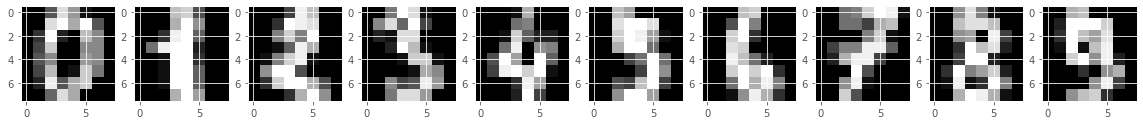

In [70]:
fig, axes = plt.subplots(1, 10, figsize=(20,15))
for i in range(10):
    axes[i].imshow(digits.images[i], cmap="gray")

In [32]:
total_distances = []

In [35]:
for k in range(1, 26):
    k_distances = []
    # Assign k clusters as randomly selected points from the dataset
    C = data[np.random.randint(data.shape[0], size= k)]
    # get the clusters iterating 200 times 
    cluster_ind, new_C = clustering(C, k, data, 200, True)
    
    # get the distances of each point 
    for i in range(len(X)):
        cluster = cluster_ind[i]
        k_distances.append(calculate_distance(data[i], new_C[cluster]))    
    
    total_distances.append(np.sum(k_distances))

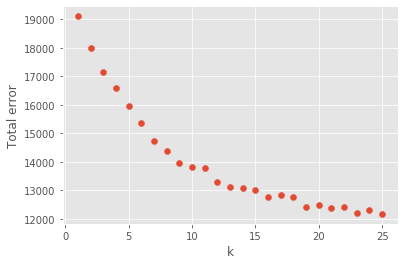

In [36]:
plt.scatter(np.arange(1, len(total_distances) + 1), total_distances)
plt.xlabel('k')
plt.ylabel('Total error');